In [106]:
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
import sys
sys.path.append("..")

%matplotlib inline
#plt.style.use('physics')

plt.rcParams['axes.grid'       ]  = False
plt.rcParams['xtick.labelsize' ]  = 14
plt.rcParams['ytick.labelsize' ]  = 14
plt.rcParams['axes.labelsize'  ]  = 14
plt.rcParams['legend.fancybox' ]  = False

pd.options.mode.chained_assignment = None

In [160]:
# data_raw = pd.read_hdf('h4g_train_gamma12_WPTight.h5')
data_raw = pd.read_hdf('h4g_24March2020_Photon34_Loose.h5')

In [161]:
data_raw.head()

,CTStarCS,CT_a1Pho1,CT_a2Pho1,a1_Pt/tp_mass,a2_Pt/tp_mass,a1_Pt/a1_mass,a2_Pt/a2_mass,a1_a2_DR,a1_Pho1PtOvera1Mass,a1_Pho2PtOvera1Mass,...,min_eta,max_eta,pass_id_gamma1,pass_id_gamma2,pass_id_gamma3,pass_id_gamma4,blind_down,blind_up,Y,Z
0,0.177450,0.573712,0.023411,0.272473,0.130982,0.755835,0.361823,2.729959,0.980174,0.246650,...,1.372356,1.443980,True,True,True,False,True,False,0.0,0.0
1,0.426507,0.102769,0.534144,0.695596,0.078682,2.137750,0.242029,2.159178,1.902999,0.407180,...,0.428452,1.473324,True,True,True,False,True,False,0.0,0.0
2,0.028979,0.634590,0.084354,0.628008,0.351320,1.857448,0.988204,0.394095,1.150112,0.751969,...,1.636328,1.695618,True,True,True,False,True,False,0.0,0.0
3,0.611375,0.166571,0.524628,0.505583,0.439320,1.672290,1.459787,1.818393,1.306328,0.635323,...,0.059645,0.401535,True,True,True,False,False,True,0.0,0.0
4,0.125639,0.701904,0.056367,0.783644,0.455880,5.032886,3.095311,1.832966,3.410579,1.622348,...,1.848672,2.533929,True,True,True,True,False,True,0.0,0.0


In [162]:
data_all = data_raw 
print len(data_all)


48917


In [163]:
data_all['m_sideband'] = np.abs(data_all.tp_mass - 125 ) > 10

In [222]:
# Flip gamma3, gamma4 WP Loose
data_all['cr_region'] = np.chararray(data_all.shape[0], itemsize=4)
data_all.loc[data_all.pho1_MVA> -1000.1, 'cr_region'] = 'TT'
data_all.loc[(data_all.pho1_MVA>-0.9) & (data_all.pho2_MVA > -0.9) & (data_all.pho3_MVA>-0.75) & (data_all.pho4_MVA > -0.75), 'cr_region'] = 'PP'
data_all.loc[(data_all.pho1_MVA>-0.9) & (data_all.pho2_MVA > -0.9) & (data_all.pho3_MVA<-0.9) & (data_all.pho4_MVA < -0.9), 'cr_region'] = 'FF'
data_all.loc[(data_all.pho1_MVA>-0.9) & (data_all.pho2_MVA > -0.9) & (data_all.pho3_MVA >-0.75) & (data_all.pho4_MVA <-0.9), 'cr_region'] = 'PF'
data_all.loc[(data_all.pho1_MVA>-0.9) & (data_all.pho2_MVA > -0.9) & (data_all.pho3_MVA <-0.9) & (data_all.pho4_MVA >-0.75), 'cr_region'] = 'FP'

In [223]:
## Flip gamma3, gamma4 WP Tight
# data_all['cr_region'] = np.chararray(data_all.shape[0], itemsize=4)
# data_all.loc[(data_all.pho1_MVA>-0.2) & (data_all.pho2_MVA > -0.4) & (data_all.pho3_MVA>-0.75) & (data_all.pho4_MVA > -0.75), 'cr_region'] = 'PP'
# data_all.loc[(data_all.pho1_MVA>-0.2) & (data_all.pho2_MVA > -0.4) & (data_all.pho3_MVA<-0.9) & (data_all.pho4_MVA < -0.9), 'cr_region'] = 'FF'
# data_all.loc[(data_all.pho1_MVA>-0.2) & (data_all.pho2_MVA > -0.4) & (data_all.pho3_MVA >-0.75) & (data_all.pho4_MVA <-0.9), 'cr_region'] = 'PF'
# data_all.loc[(data_all.pho1_MVA>-0.2) & (data_all.pho2_MVA > -0.4) & (data_all.pho3_MVA <-0.9) & (data_all.pho4_MVA >-0.75), 'cr_region'] = 'FP'

In [224]:
## Flip gamma1, gamma2 WP Loose
# data_all['cr_region'] = np.chararray(data_all.shape[0], itemsize=4)
# data_all.loc[(data_all.pho1_MVA>-0.9) & (data_all.pho2_MVA > -0.9) & (data_all.pho3_MVA>-0.75) & (data_all.pho4_MVA > -0.75), 'cr_region'] = 'PP'
# data_all.loc[(data_all.pho1_MVA<-0.9) & (data_all.pho2_MVA < -0.9) & (data_all.pho3_MVA>-0.75) & (data_all.pho4_MVA > -0.75), 'cr_region'] = 'FF'
# data_all.loc[(data_all.pho1_MVA>-0.9) & (data_all.pho2_MVA < -0.9) & (data_all.pho3_MVA >-0.75) & (data_all.pho4_MVA > -0.75), 'cr_region'] = 'PF'
# data_all.loc[(data_all.pho1_MVA<-0.9) & (data_all.pho2_MVA > -0.9) & (data_all.pho3_MVA > -0.75) & (data_all.pho4_MVA >-0.75), 'cr_region'] = 'FP'

In [225]:
# # ## Flip gamma1, gamma2 WP Tight
# data_all['cr_region'] = np.chararray(data_all.shape[0], itemsize=4)
# data_all.loc[(data_all.pho1_MVA>-0.2) & (data_all.pho2_MVA > -0.4) & (data_all.pho3_MVA>-0.75) & (data_all.pho4_MVA > -0.75), 'cr_region'] = 'PP'
# data_all.loc[(data_all.pho1_MVA<-0.2) & (data_all.pho2_MVA < -0.4) & (data_all.pho3_MVA>-0.75) & (data_all.pho4_MVA > -0.75), 'cr_region'] = 'FF'
# data_all.loc[(data_all.pho1_MVA>-0.2) & (data_all.pho2_MVA < -0.4) & (data_all.pho3_MVA >-0.75) & (data_all.pho4_MVA > -0.75), 'cr_region'] = 'PF'
# data_all.loc[(data_all.pho1_MVA<-0.2) & (data_all.pho2_MVA > -0.4) & (data_all.pho3_MVA > -0.75) & (data_all.pho4_MVA >-0.75), 'cr_region'] = 'FP'

In [226]:
def h4g_presel(data):
    return (
        (data["tp_mass"         ]> 110    )&
        (data["tp_mass"         ]< 180    ) &
        (data["pho1_pt"         ]> 30     ) &
        (data["pho2_pt"         ]> 18     ) &
        (data["pho3_pt"         ]> 15     )&
        (data["pho4_pt"         ]> 15     ) &
        (data["pho1_electronveto"  ] ==1   )&
        (data["pho2_electronveto"  ] ==1   )&
        (data["pho3_electronveto"  ] ==1   )&
        (data["pho4_electronveto"  ] ==1   ) & 
        (data["pho1_eta"] < 2.5 ) &
        (data["pho2_eta"] < 2.5 ) &
        (data["pho3_eta"] < 2.5 ) &
        (data["pho4_eta"] < 2.5 ) & 
        (data["pho1_eta"] > -2.5 ) &
        (data["pho2_eta"] > -2.5 ) &
        (data["pho3_eta"] > -2.5 ) &
        (data["pho4_eta"] > -2.5 ) &
        ((data["pho1_eta"] < 1.4442) | (data["pho1_eta"] > 1.566)) &
        ((data["pho2_eta"] < 1.4442) | (data["pho2_eta"] > 1.566)) &
        ((data["pho3_eta"] < 1.4442) | (data["pho3_eta"] > 1.566)) &
        ((data["pho4_eta"] < 1.4442) | (data["pho4_eta"] > 1.566)) &
        ((data["pho1_eta"] > -1.4442)| (data["pho1_eta"] < -1.566)) &
        ((data["pho2_eta"] > -1.4442)| (data["pho2_eta"] < -1.566)) &
        ((data["pho3_eta"] > -1.4442)| (data["pho3_eta"] < -1.566)) &
        ((data["pho4_eta"] > -1.4442)| (data["pho4_eta"] < -1.566))
        
    )

data_all['ish4g'] = h4g_presel(data_all)

In [227]:
data_all['eta_cat'] = np.chararray(data_all.shape[0], itemsize=4)
data_all.loc[((np.abs(data_all.pho3_eta   )>=0)&(np.abs(data_all.pho3_eta   )<1.5) & 
              (np.abs(data_all.pho4_eta)>=0)&(np.abs(data_all.pho4_eta)<1.5)), 'eta_cat']  = 'EBEB'

data_all.loc[((np.abs(data_all.pho3_eta   )>=0)&(np.abs(data_all.pho3_eta   )<1.5) & 
              (np.abs(data_all.pho4_eta)>=1.5)&(np.abs(data_all.pho4_eta)<=3)), 'eta_cat'] = 'EBEE'

data_all.loc[((np.abs(data_all.pho3_eta   )>=1.5)&(np.abs(data_all.pho3_eta   )<=3) & 
              (np.abs(data_all.pho4_eta)>=0)&(np.abs(data_all.pho4_eta)<1.5)), 'eta_cat']  = 'EEEB'

data_all.loc[((np.abs(data_all.pho3_eta   )>=1.5)&(np.abs(data_all.pho3_eta   )<=3) & 
              (np.abs(data_all.pho4_eta)>=1.5)&(np.abs(data_all.pho4_eta)<=3)), 'eta_cat'] = 'EEEE'

In [228]:
data_all['lead_eta_cat'] = np.chararray(data_all.shape[0], itemsize=4)
data_all['subl_eta_cat'] = np.chararray(data_all.shape[0], itemsize=4)

data_all.loc[((np.abs(data_all.pho3_eta)>=0  )&(np.abs(data_all.pho3_eta)<1.5)),'lead_eta_cat']='EB'
data_all.loc[((np.abs(data_all.pho3_eta)>=1.5)&(np.abs(data_all.pho3_eta)<= 3)),'lead_eta_cat']='EE'

data_all.loc[((np.abs(data_all.pho4_eta)>=0  )&(np.abs(data_all.pho4_eta)<1.5)),'subl_eta_cat']='EB'
data_all.loc[((np.abs(data_all.pho4_eta)>=1.5)&(np.abs(data_all.pho4_eta)<=3 )),'subl_eta_cat']='EE'

In [229]:
data_all['avg_et' ] = (data_all.pho3_pt +  data_all.pho4_pt)/2.0
data_all['diff_et'] = (data_all.pho3_pt -  data_all.pho4_pt)

In [230]:
def divide( a, b ):
    """ ignore / 0, div0( [-1, 0, 1], 0 ) -> [0, 0, 0] """
    with np.errstate(divide='ignore', invalid='ignore'):
        c = np.true_divide( a, b )
        c[ ~ np.isfinite( c )] = 0  # -inf inf NaN
    return c

In [231]:
def fake_factor(data, variable, bins, region = 'FP'):
#     for i in range(len(bins)-1):
#         print np.array(bins[i+1])
#         print "*****"
#         print np.array(bins[i])
        
    xd = np.array([(bins[i+1]+ bins[i])/2.0 for i in range(len(bins)-1)])
    xe = np.array([(bins[i+1]- bins[i])/2.0 for i in range(len(bins)-1)])
#     print "xd ", xd
    h_pass,_ = np.histogram(data[data.cr_region=='PP'][variable],
                            weights=data[data.cr_region=='PP'].weight, bins=bins )
    h_fail,_ = np.histogram(data[data.cr_region==region][variable],
                            weights=data[data.cr_region==region].weight, bins=bins )
#     print "fake factor region:", region
    factor = divide(h_pass,h_fail)
#     print "factor: ", factor
    er1 = divide(1.0,np.sqrt(h_pass))
    er2 = divide(1.0,np.sqrt(h_fail))
    ferr = factor * np.sqrt(er1**2 + er2**2)
    up = dw = ferr/2.0
    return (xd,xe,factor, dw, up)

In [232]:
def qcd_purity(data, variable, bins, region = 'PP'):
    xd = np.array([(bins[i+1]+ bins[i])/2.0 for i in range(len(bins)-1)])
    xe = np.array([(bins[i+1]- bins[i])/2.0 for i in range(len(bins)-1)])
    
    h_QCD,_ = np.histogram(data[(data.cr_region==region)&(data.Z == 0)][variable],
                            weights=data[(data.cr_region==region)&(data.Z == 0)].weight, 
                            bins=bins )
    h_EWK,_ = np.histogram(data[(data.cr_region==region)&(data.Z==1)][variable],
                            weights=data[(data.cr_region==region)&(data.Z==1)].weight, 
                            bins=bins )
    h_ALL = h_EWK + h_QCD
    factor = divide(h_QCD,h_ALL)
    er1 = divide(1.0,np.sqrt(h_QCD))
    er2 = divide(1.0,np.sqrt(h_ALL))
    ferr = factor * (1 -  factor) / h_ALL
    
    up = np.minimum(ferr/2.0,np.ones (ferr.shape[0]))
    dw = np.maximum(ferr/2.0,np.zeros(ferr.shape[0]))
    return (xd,xe,factor,dw, up)

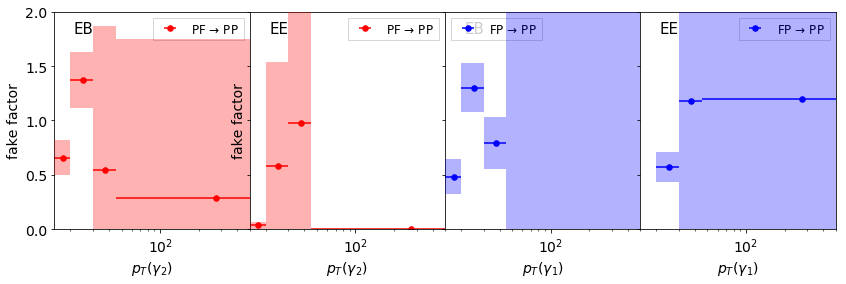

In [233]:
# wbins = np.array([10,15,30,45,60])
# wbins = np.array([10,30,40,60,100])
# wbins = np.array([15,20,25,30,35,45,50])
# wbins = np.array([10,15,20,30,45])
# wbins = np.array([10,15,20,30])
# wbins = np.array([20,30,45,65,1000])
# wbins = np.array([10,15,20])
# wbins = np.array([20,30,45,65])
# wbins = np.array([20,30])
# wbins = np.array([10,20,30])
# wbins = np.array([0,10,12,15,17,20,25,30,35,40,100,200,1000])
# wbins = np.array([10,15,20,25,30,35,1000])
# wbins = np.array([18,30,35,40,10000])
wbins = np.array([15,20,30,45,500])
# wbins = np.array([15,20,25,30,40,1000])
# wbins = np.array([15,20,30,10000])
# wbins = np.array([18,25,30,40,1000])
# wbins = np.array([18,30,40,50,500])
fig, ax = plt.subplots(1,4, sharex=True, sharey=True, figsize=(14,4))
fig.subplots_adjust(wspace=0)
for i, reg in enumerate(np.unique(data_all.lead_eta_cat)):
#     print "i", i
#     print "reg", reg
    x, xe,f_pf,dw_pf,up_pf = fake_factor(data_all[(data_all.Y==0)&(data_all.Z==0)&(data_all.lead_eta_cat==reg)],
                             'pho4_pt',wbins,region='PF')
    x, xe,f_fp,dw_fp,up_fp = fake_factor(data_all[(data_all.Y==0)&(data_all.Z==0)&(data_all.subl_eta_cat==reg)],
                             'pho3_pt',wbins,region='FP')
    ax[i].errorbar(x,f_pf,xerr=xe,fmt='.', markersize=11,capthick=0, alpha=1.0, color='r', label='PF $\\to$ PP')
    ax[i+2].errorbar(x,f_fp,xerr=xe,fmt='.', markersize=11,capthick=0, alpha=1.0, color='b', label='FP $\\to$ PP')
    ax[i].bar(x,2*(up_pf),bottom = f_pf - dw_pf, width= 2*xe, color='r',alpha=0.3, zorder=9, 
            align='center',edgecolor='None',lw=0.0)
    ax[i+2].bar(x,2*(up_fp),bottom = f_fp - dw_fp, width= 2*xe, color='b',alpha=0.3, zorder=9, 
            align='center',edgecolor='None',lw=0.0)
    ax[i  ].axhline(0,color='black',ls='--',lw=0.5)
    ax[i+2].axhline(0,color='black',ls='--',lw=0.5)
    ax[i].set_xscale('log')
    ax[i  ].set_xlabel('$p_{T}(\gamma_%i)$' % 2)
    ax[i+2].set_xlabel('$p_{T}(\gamma_%i)$' % 1)
    ax[i].set_xlim(np.min(wbins), np.max(wbins))
    ax[i].set_ylim(0,2 )
    ax[i].annotate(reg,xy=(0.1,0.9), fontsize=15,xycoords='axes fraction')
    ax[i+2].annotate(reg,xy=(0.1,0.9), fontsize=15,xycoords='axes fraction')
    ax[i].legend(fontsize=12)
    ax[i+2].legend(fontsize=12)
    
    ax[i].set_ylabel('fake factor')

Text(0,0.5,'QCD fraction')

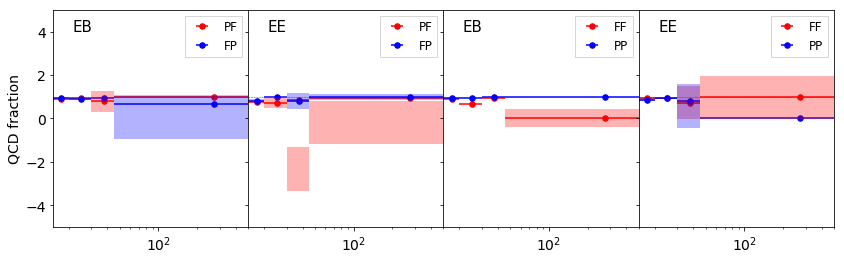

In [234]:
# wbins = np.array([10,15,30,45,65])
# wbins = np.array([15,20,25,30,35,45,50])
# wbins = np.array([10,30,40,60,100])
# wbins = np.array([10,15,20,30,45])
# wbins = np.array([0,30,45,65,1000])
# wbins = np.array([10,15,20,30,45])
# wbins = np.array([10,15,20])
# wbins = np.array([20,30,45,65,1000])
# wbins = np.array([20,30,45,65])

# wbins = np.array([15,20,25,30,35,45,50])
# wbins = np.array([20,30])
# wbins = np.array([10,20,30])
# wbins = np.array([0,10,12,15,17,20,25,30,35,40,100,200,1000])
# wbins = np.array([30,35,40,45,50,100])
# wbins = np.array([10,15,20,25,30,35,1000])
# wbins = np.array([18,30,35,40,10000])
# wbins = np.array([15,20,30,45,1000])
# wbins = np.array([15,20,25,30,40,1000])
# wbins = np.array([15,20,30,10000])
# wbins = np.array([18,25,30,40,1000])
wbins = np.array([15,20,30,45,500])
# wbins = np.array([18,30,40,50,500])

fig, ax = plt.subplots(1,4, sharex=True, sharey=True, figsize=(14,4))
fig.subplots_adjust(wspace=0)
for i, reg in enumerate(np.unique(data_all.lead_eta_cat)):
    x, xe,pf,dw_pf,up_pf = qcd_purity(data_all[(data_all.Y==0)&(data_all.subl_eta_cat==reg)],'pho4_pt',wbins,region='PF')
    x, xe,fp,dw_fp,up_fp = qcd_purity(data_all[(data_all.Y==0)&(data_all.lead_eta_cat==reg)],'pho3_pt',wbins,region='FP')
    
    x, xe,ff,dw_ff,up_ff = qcd_purity(data_all[(data_all.Y==0)&(data_all.lead_eta_cat==reg)],'avg_pt',wbins,region='FF')
    x, xe,pp,dw_pp,up_pp = qcd_purity(data_all[(data_all.Y==0)&(data_all.lead_eta_cat==reg)],'avg_pt',wbins,region='PP')

    ax[i].errorbar(x,pf,xerr=xe,fmt='.', markersize=11,capthick=0, alpha=1.0, color='r', label='PF')
    ax[i].errorbar(x,fp,xerr=xe,fmt='.', markersize=11,capthick=0, alpha=1.0, color='b', label='FP')
    
    ax[i+2].errorbar(x,ff,xerr=xe,fmt='.', markersize=11,capthick=0, alpha=1.0, color='r', label='FF')
    ax[i+2].errorbar(x,pp,xerr=xe,fmt='.', markersize=11,capthick=0, alpha=1.0, color='b', label='PP')
    ax[i].bar(x,2*(up_pf),bottom = pf - dw_pf, width= 2*xe, color='r',alpha=0.3, zorder=9, 
            align='center',edgecolor='None',lw=0.0)
    ax[i].bar(x,2*(up_fp),bottom =(fp - dw_fp), width= 2*xe, color='b',alpha=0.3, zorder=9, 
            align='center',edgecolor='None',lw=0.0)
    
    ax[i+2].bar(x,2*(up_ff),bottom = ff - dw_ff, width= 2*xe, color='r',alpha=0.3, zorder=9, 
            align='center',edgecolor='None',lw=0.0)
    ax[i+2].bar(x,2*(up_pp),bottom =(pp - dw_pp), width= 2*xe, color='b',alpha=0.3, zorder=9, 
            align='center',edgecolor='None',lw=0.0)
    ax[i].axhline(1,color='red',ls='--',lw=0.5)
    ax[i+2].axhline(1,color='red',ls='--',lw=0.5)
    ax[i].set_xscale('log')
    ax[i].set_xlim(np.min(wbins), np.max(wbins))
    ax[i].set_ylim(-5, 5)
    ax[i].annotate(reg,xy=(0.1,0.9), fontsize=15,xycoords='axes fraction')
    ax[i+2].annotate(reg,xy=(0.1,0.9), fontsize=15,xycoords='axes fraction')
    ax[i].legend(fontsize=12)
    ax[i+2].legend(fontsize=12)
    
ax[0].set_ylabel('QCD fraction')

In [235]:
np.unique(data_all[(data_all.Z==0)]['sample'])

array(['data', 'gjet', 'h4g_6', 'qcd'], dtype=object)

In [236]:
fake_PF = {}
fake_PF['EB'] = fake_factor(data_all[(data_all['sample'] == 'gjet')&(data_all.lead_eta_cat=='EB')],
                            'pho4_pt',wbins,region='PF')[2]
fake_PF['EE'] = fake_factor(data_all[(data_all['sample'] == 'gjet')&(data_all.lead_eta_cat=='EE')],
                            'pho4_pt',wbins,region='PF')[2]
fake_PF

{'EB': array([0.65721023, 2.597127  , 0.5433303 , 0.28463545], dtype=float32),
 'EE': array([0.02803938, 0.57910347, 0.97397244, 0.        ], dtype=float32)}

In [237]:
purity_PF = {}
purity_PF['EB'] = qcd_purity(data_all[(data_all.Y==0)&(data_all.lead_eta_cat=='EB')],
                            'pho4_pt',wbins,region='PF')[2]
purity_PF['EE'] = qcd_purity(data_all[(data_all.Y==0)&(data_all.lead_eta_cat=='EE')],
                            'pho4_pt',wbins,region='PF')[2]
purity_PF

{'EB': array([0.84074354, 0.9610481 , 0.7714869 , 0.9965175 ], dtype=float32),
 'EE': array([0.9628656 , 0.65382123, 0.90936214, 0.        ], dtype=float32)}

In [238]:
fake_FP = {}
fake_FP['EB'] = fake_factor(data_all[(data_all['sample'] == 'gjet')&(data_all.lead_eta_cat=='EB')],
                            'pho3_pt',wbins,region='FP')[2]
fake_FP['EE'] = fake_factor(data_all[(data_all['sample'] == 'gjet')&(data_all.lead_eta_cat=='EE')],
                            'pho3_pt',wbins,region='FP')[2]

fake_FP

{'EB': array([0.8660244 , 1.8132477 , 0.79837066, 4.182924  ], dtype=float32),
 'EE': array([3.0988169 , 0.15756719, 0.97448885, 0.5753554 ], dtype=float32)}

In [239]:
purity_FP = {}
purity_FP['EB'] = qcd_purity(data_all[(data_all.Y==0)&(data_all.lead_eta_cat=='EB')],
                            'pho3_pt',wbins,region='FP')[2]
purity_FP['EE'] = qcd_purity(data_all[(data_all.Y==0)&(data_all.lead_eta_cat=='EE')],
                            'pho3_pt',wbins,region='FP')[2]
# purity_FP

In [240]:
fake_FF = {}
fake_FF['EB'] = fake_factor(data_all[(data_all['sample'] == 'gjet')&(data_all.eta_cat=='EB')],
                            'pho3_pt',wbins,region='FP')[2]
fake_FF['EE'] = fake_factor(data_all[(data_all['sample'] == 'gjet')&(data_all.eta_cat=='EE')],
                            'pho3_pt',wbins,region='FP')[2]
fake_FF

{'EB': array([0., 0., 0., 0.], dtype=float32),
 'EE': array([0., 0., 0., 0.], dtype=float32)}

In [251]:
# data_region = data_all[ (data_all.Y == 2)
#                       & (data_all.ish4g)
#                       ]
# data_SMMC   = data_all[ (data_all.Y == 0)
#                       & (data_all.ish4g)
#                       ]
# data_signal = data_all[ (data_all.Y == 1)
#                       & (data_all.ish4g)
#                       ]
data_presel = data_all[(data_all.Y == 2)& (data_all.ish4g)& ~( (data_all.blind_down == True ) & (data_all.blind_up == True)) ]

data_region = data_all[(data_all.pass_id_gamma1 == True) & (data_all.pass_id_gamma2 == True) & (data_all.pass_id_gamma3 == True) & (data_all.pass_id_gamma4 == True) & ~( (data_all.blind_down == True ) & (data_all.blind_up == True))& (data_all.Y == 2)
                      & (data_all.ish4g)
                      ]
data_SMMC   = data_all[(data_all.pass_id_gamma1 == True) & (data_all.pass_id_gamma2 == True) & (data_all.pass_id_gamma3 == True) & (data_all.pass_id_gamma4 == True) & ~( (data_all.blind_down == True ) & (data_all.blind_up == True))& (data_all.Y == 0)
                      & (data_all.ish4g)
                      ]
data_signal = data_all[(data_all.pass_id_gamma1 == True) & (data_all.pass_id_gamma2 == True) & (data_all.pass_id_gamma3 == True) & (data_all.pass_id_gamma4 == True) & (data_all.Y == 1)
                      & (data_all.ish4g)
                      ]

print data_region.shape
print data_signal.shape
print data_SMMC.shape

(195, 65)
(0, 65)
(1242, 65)


In [252]:
dd_FP = data_all[(data_all.cr_region == 'FP') & (data_all.Y == 2)
                & (data_all.ish4g)
                ]
dd_PF = data_all[(data_all.cr_region == 'PF') & (data_all.Y == 2)
                & (data_all.ish4g)
                ]
dd_FF = data_all[(data_all.cr_region == 'FF') & (data_all.Y == 2)
                & (data_all.ish4g)
                ]

print dd_FF

      CTStarCS  CT_a1Pho1  CT_a2Pho1  a1_Pt/tp_mass  a2_Pt/tp_mass  \
4     0.731277   0.058014   0.732000       0.133891       0.121849   
39    0.509828   0.237763   0.654769       0.232077       0.159466   
50    0.980274   0.051644   0.876165       0.165551       0.097009   
51    0.593100   0.947390   0.713456       0.434326       0.064560   
54    0.961111   0.947143   0.349714       0.073144       0.060122   
58    0.150594   0.050184   0.232887       0.374345       0.369205   
63    0.356892   0.641029   0.016281       0.262430       0.234423   
68    0.910132   0.256950   0.699654       0.189196       0.100989   
75    0.320257   0.203586   0.030746       0.350162       0.253239   
85    0.931452   0.635182   0.169522       0.124568       0.097588   
97    0.606000   0.321735   0.154708       0.258940       0.103069   
104   0.580019   0.199615   0.096274       0.385753       0.131005   
105   0.751278   0.617337   0.671003       0.364717       0.216727   
110   0.971581   0.5

In [253]:
# wbins = np.array([15,20])
# print dd_FP.shape
# print dd_PF.shape
# print dd_FF.shape
# print dd_PP.shape
# dd_FP.columns
# print wbins

dd_FP.loc[:,'weight_bins'] = pd.cut( dd_FP.pho3_pt    ,wbins, labels= False)
dd_PF.loc[:,'weight_bins'] = pd.cut( dd_PF.pho4_pt    ,wbins, labels= False)
dd_FF.loc[:,'weight_bins'] = pd.cut( dd_FF.avg_pt     ,wbins, labels= False)


print dd_FF
# np.unique(dd_FP.loc[:,'pho1_pt'].values)
# dd_FP.loc[:,'weight']
# np.unique(dd_PF.loc[:,'weight_bins'].values)
# print dd_PF.loc[:,'weight_bins']
# print pd.cut( dd_FP.pho1_pt    ,[20,30], labels= True)
# print dd_FP.pho3_pt

      CTStarCS  CT_a1Pho1  CT_a2Pho1  a1_Pt/tp_mass  a2_Pt/tp_mass  \
4     0.731277   0.058014   0.732000       0.133891       0.121849   
39    0.509828   0.237763   0.654769       0.232077       0.159466   
50    0.980274   0.051644   0.876165       0.165551       0.097009   
51    0.593100   0.947390   0.713456       0.434326       0.064560   
54    0.961111   0.947143   0.349714       0.073144       0.060122   
58    0.150594   0.050184   0.232887       0.374345       0.369205   
63    0.356892   0.641029   0.016281       0.262430       0.234423   
68    0.910132   0.256950   0.699654       0.189196       0.100989   
75    0.320257   0.203586   0.030746       0.350162       0.253239   
85    0.931452   0.635182   0.169522       0.124568       0.097588   
97    0.606000   0.321735   0.154708       0.258940       0.103069   
104   0.580019   0.199615   0.096274       0.385753       0.131005   
105   0.751278   0.617337   0.671003       0.364717       0.216727   
110   0.971581   0.5

In [254]:
lumi = 35.9
dd_PF.weight = np.ones(dd_PF.shape[0])
print np.unique(dd_PF.weight_bins.values)
# print np.unique(dd_PF.weight_bins.values)
for b in np.unique(dd_PF.weight_bins.values):
    print b
    for cat in np.unique(dd_PF.subl_eta_cat):
        print cat
        w = dd_PF[(dd_PF.weight_bins == b) & (dd_PF.subl_eta_cat == cat)].weight.values 
#         print w
        w = w * fake_PF[cat][b]/lumi
#         w = w * fake_PF[cat][b] * purity_PF[cat][b] / lumi
        dd_PF.loc[(dd_PF.weight_bins == b) & (dd_PF.subl_eta_cat == cat), 'weight'] = w
        
        
print dd_PF.weight        

[0 1 2]
0
EB
EE
1
EB
EE
2
EB
EE
9       0.018307
12      0.018307
25      0.000781
27      0.072343
32      0.072343
52      0.018307
83      0.018307
94      0.018307
98      0.018307
124     0.000781
141     0.018307
245     0.018307
305     0.018307
361     0.072343
454     0.072343
500     0.018307
518     0.072343
552     0.018307
554     0.018307
637     0.018307
640     0.018307
652     0.072343
671     0.072343
677     0.000781
678     0.018307
700     0.018307
713     0.018307
764     0.018307
765     0.018307
805     0.018307
          ...   
7827    0.018307
7829    0.016131
7834    0.018307
7841    0.072343
7875    0.018307
7880    0.018307
7930    0.018307
7931    0.000781
7964    0.018307
7982    0.000781
7986    0.072343
7998    0.018307
8002    0.018307
8005    0.018307
8067    0.018307
8075    0.018307
8103    0.018307
8143    0.000781
8195    0.016131
8196    0.018307
8261    0.018307
8281    0.015135
8299    0.018307
8324    0.018307
8329    0.018307
8330    0.018307

In [255]:
lumi = 35.9
dd_FP.weight = np.ones(dd_FP.shape[0])
# print dd_FP.weight
for b in np.unique(dd_FP.weight_bins.values):
    for cat in np.unique(dd_FP.lead_eta_cat):
        w = dd_FP[(dd_FP.weight_bins == b) & (dd_FP.lead_eta_cat == cat)].weight.values 
#         print w
        w = w * fake_FP[cat][b] / lumi
#         w = w * fake_FP[cat][b] * purity_FP[cat][b]/ lumi
        
        dd_FP.loc[(dd_FP.weight_bins == b) & (dd_FP.lead_eta_cat == cat), 'weight'] = w

In [256]:
lumi = 35.9
dd_FF.weight = np.ones(dd_FF.shape[0])
for b in np.unique(dd_FF.weight_bins.values):
    for cat in np.unique(dd_FF.eta_cat):
        w = dd_FF[(dd_FF.weight_bins == b) & (dd_FF.eta_cat == cat)].weight.values 
        w = -1 * w * fake_PF[cat[:-2]][b] * fake_FP[cat[2:]][b]/ lumi

#         w = w * purity_PF[cat[:-2]][b] * purity_FP[cat[2:]][b] # this was commented before
#         w = -1 * w * fake_PF[cat[:-2]][b] / lumi
        dd_FF.loc[(dd_FF.weight_bins == b) & (dd_FF.eta_cat == cat), 'weight'] = w

In [257]:
import numpy as np
from scipy.optimize import minimize

Optimization terminated successfully.
         Current function value: 0.657730
         Iterations: 78
         Function evaluations: 148
[0.24329838 0.0166438 ]
[0.24329838 0.0166438 ]


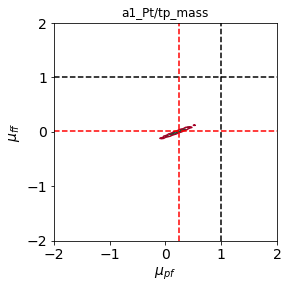

In [258]:
def fit(var = 'tp_mass',
        bins_ = np.linspace(0,1000,25), L=35.9 ) :
    hd, xd = np.histogram(data_region[(data_region.Y == 2)][var],
                          weights=data_region[(data_region.Y == 2)].weight,
                          bins=bins_)
    h_pf, xd = np.histogram(dd_PF[var], weights=dd_PF.weight * L, bins=bins_)
    h_fp, xd = np.histogram(dd_FP[var], weights=dd_FP.weight * L, bins=bins_)
    h_ff, xd = np.histogram(dd_FF[var], weights=dd_FF.weight * L, bins=bins_)
    
    pp, xd = np.histogram(data_SMMC[(data_SMMC['sample'] == 'dipho')][var],
                          weights=data_SMMC[(data_SMMC['sample'] == 'dipho')].weight * L,
                          bins=bins_)
    def residual(a,b):
        return divide(((pp + a*(h_pf + h_fp) + b*h_ff) - hd),np.sqrt(hd))**2
    def chi2(a,b):
        return  np.sum(divide(((pp + a*(h_pf + h_fp) + b*h_ff) - hd),
                              np.sqrt(np.abs(hd + (pp + a*(h_pf + h_fp) + b*h_ff))))**2 )
    chi2 = np.vectorize(chi2)
    def func_(x):
        return  np.sum(divide(hd - pp - x[0]*(h_pf + h_fp)- x[1]*h_ff,np.sqrt(hd))**2)/hd.shape[0]
    
    a = np.linspace(-2,2,101)
    b = np.linspace(-2,2,101)
    
    v_, w_ = np.meshgrid(a,b)
    
    x0 = np.array([1,1])
    res = minimize(func_, x0, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})
    
    plt.figure(figsize=(4,4))
    plt.title(var)
    z_ = chi2(v_,w_)
    plt.contour(v_,w_, z_, np.linspace(np.min(z_), 2*np.min(z_), 3), cmap=plt.cm.RdYlGn_r)
    plt.xlabel("$\mu_{pf}$")
    plt.ylabel("$\mu_{ff}$")
    
    plt.axvline(1,ls='--',color='k')
    plt.axhline(1,ls='--',color='k')
    
    plt.axvline(res.x[0],ls='--',color='r')
    plt.axhline(res.x[1],ls='--',color='r')
    print res.x
    return  res.x
    
    
norm = fit(var = 'a1_Pt/tp_mass'       , bins_ = np.linspace(0, 1,21), L=35.9)

print norm

In [259]:
dd_PF.weight = dd_PF.weight * norm[0]
dd_FP.weight = dd_FP.weight * norm[0]
dd_FF.weight = dd_FF.weight * norm[1]

data_driven = pd.concat([dd_PF, dd_FP, dd_FF])
# data_driven = pd.concat([dd_PF, dd_FF])
# print data_driven

print dd_PF.weight


9       0.004454
12      0.004454
25      0.000190
27      0.017601
32      0.017601
52      0.004454
83      0.004454
94      0.004454
98      0.004454
124     0.000190
141     0.004454
245     0.004454
305     0.004454
361     0.017601
454     0.017601
500     0.004454
518     0.017601
552     0.004454
554     0.004454
637     0.004454
640     0.004454
652     0.017601
671     0.017601
677     0.000190
678     0.004454
700     0.004454
713     0.004454
764     0.004454
765     0.004454
805     0.004454
          ...   
7827    0.004454
7829    0.003925
7834    0.004454
7841    0.017601
7875    0.004454
7880    0.004454
7930    0.004454
7931    0.000190
7964    0.004454
7982    0.000190
7986    0.017601
7998    0.004454
8002    0.004454
8005    0.004454
8067    0.004454
8075    0.004454
8103    0.004454
8143    0.000190
8195    0.003925
8196    0.004454
8261    0.004454
8281    0.003682
8299    0.004454
8324    0.004454
8329    0.004454
8330    0.004454
8354    0.004454
8359    0.0176

In [260]:
# from matplotlib import gridspec

# def varibale_data_driven(var = 'tp_mass',var_label='$m_{jj}$ (GeV)', label='',
#                          bins_ = np.linspace(0,1000,25),blind=True, title='H4G preselection',
#                          mu=0.9, log = True, normed = False, L=35.9, xlog = False, y_min=0, y_max=40) :
#     plt.figure(figsize=(6,9))
#     gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1])
#     #     ax1 = plt.subplot2grid((4,1), (0,0),rowspan=2)
#     ax1 = plt.subplot(gs[0])
    
#     hd, xd = np.histogram(data_region[(data_region.Y == 2)][var], normed=normed,
#                           weights=data_region[(data_region.Y == 2)].weight,
#                           bins=bins_)  ## data 
#     print "hd: " , hd
    
#     dd, xd = np.histogram(data_driven[(data_driven.Y == 2)][var], normed=normed,
#                           weights=data_driven[(data_driven.Y == 2)].weight * L,
#                           bins=bins_) ## data driven background contribution
#     gg, xd = np.histogram(data_SMMC[(data_SMMC['sample'] == 'dipho')][var], normed=normed,
#                           weights=data_SMMC[(data_SMMC['sample'] == 'dipho')].weight * L,
#                           bins=bins_) ## diphoton MC contribution
    
#     mc, xd = np.histogram(data_SMMC[(data_SMMC['sample'] == 'h4g')][var], normed=normed,
#                           weights=data_SMMC[(data_SMMC['sample'] == 'h4g')].weight * L,
#                           bins=bins_)
    
#     h4g, xd = np.histogram(data_signal[(data_signal['sample'] == 'h4g_60_sig')][var], normed=normed,
#                            weights=data_signal[(data_signal['sample'] == 'h4g_60_sig')].weight * L * 1000,
#                            bins=bins_)

#     mc, xd = np.histogram(data_signal[(data_signal['sample'] == 'h4g')][var], normed=normed,
#                            weights=data_signal[(data_signal['sample'] == 'h4g')].weight * L ,
#                            bins=bins_)

#     ddw, xd = np.histogram(data_driven[(data_driven.Y == 2)][var], normed=normed,
#                           weights=(data_driven[(data_driven.Y == 2)].weight)**2,
#                           bins=bins_)
    
#     mcw, xd = np.histogram(data_SMMC[(data_SMMC['sample'] == 'h4g')][var], normed=normed,
#                           weights=(data_SMMC[(data_SMMC['sample'] == 'h4g')].weight * L)**2,
#                           bins=bins_)

#     ggw, xd = np.histogram(data_SMMC[(data_SMMC['sample'] == 'dipho')][var], normed=normed,
#                           weights=(data_SMMC[(data_SMMC['sample'] == 'dipho')].weight * L)**2,
#                           bins=bins_)
    
# #     hdw, xd = np.histogram(data_region[(data_driven.Y == 2)][var], normed=normed,
# #                           weights=(data_region[(data_region.Y == 2)].weight)**2,
# #                           bins=bins_)
# #     print "hdw : ", hdw
    
#     xd = np.array([(bins_[i+1]+ bins_[i])/2.0 for i in range(len(bins_)-1)])
#     xe = np.array([(bins_[i+1]- bins_[i])/2.0 for i in range(len(bins_)-1)])
    
#     ax1.annotate(title, xy=(1, 1.008), xycoords='axes fraction', fontsize=12,
#                  horizontalalignment='right', verticalalignment='bottom')
#     if blind:
#         ax1.errorbar(xd[abs(xd-125)>10], hd[abs(xd-125)>10], xerr=xe[abs(xd-125)>10], 
#                      yerr=np.sqrt(hd[abs(xd-125)>10]), fmt='.', c='black', 
#                      markersize=11,capthick=0,
#                      alpha=1.0, label='data')
#     else:
#         ax1.errorbar(xd, hd, xerr=xe, 
#                      yerr=np.sqrt(hd), fmt='.', c='black', 
#                      markersize=11,capthick=0,
#                      alpha=1.0, label='data')
#     plt.hist([data_SMMC[(data_SMMC['sample'] == 'dipho')][var], data_driven[var]], 
#              normed=normed,
#              weights=[
#                  data_SMMC[(data_SMMC['sample'] == 'dipho')].weight * L,
#                  data_driven.weight * L
#              ],
#              lw=1.2,bins=bins_, histtype='stepfilled', stacked=True,
#              color=['#70C1B3','#C5D2DB'],label=['$\gamma\gamma$ (Sherpa)','$\gamma$j + jj (data-driven)'])
    
#     ax1.errorbar(xd, (dd + gg),xerr=xe, fmt='.', c='green', 
#                  markersize=1,capthick=0,
#                  alpha=1.0)
# #     ax1.errorbar(xd, mc,xerr=xe, fmt='.', c='blue', 
# #                  markersize=1,capthick=0,
# #                  alpha=1.0, label='MC')
# #     ax1.step(xd, mc, where='mid',color='blue')
    
# #     ax1.errorbar(xd, h4g,xerr=xe, fmt='.', c='red', 
# #                  markersize=1,capthick=0,
# #                  alpha=1.0, label='VBF $\\times 10^2$')
# #     ax1.step(xd, h4g, where='mid',color='red')
    
# #     ax1.errorbar(xd, ggh,xerr=xe, fmt='.', c='#F9AD0B', 
# #                  markersize=1,capthick=0,
# #                  alpha=1.0, label='ggH $\\times 10$')
# #     ax1.step(xd, ggh, where='mid',color='#F9AD0B')
    
# #     ax1.errorbar(xd, ggh,xerr=xe, fmt='.', c='red', 
# #                  markersize=1,capthick=0,
# #                  alpha=1.0, label='VBF $\\times 10^2$')
# #     ax1.step(xd, mc, where='mid',color='red')
#     ax1.bar(xd,2*np.sqrt(ddw + ggw),
#             bottom = (dd + gg)-np.sqrt(ddw + ggw),width= 2*xe, 
#             color='red',alpha=0.3, zorder=12, 
#             align='center',edgecolor='None',lw=0.0,
#             label='stat')
    
#     ax1.set_xlim([min(bins_), max(bins_)])
# #     ax1.set_ylim(y_min,y_max)
    
#     if log : 
# #         ax1.set_ylim(y_min,y_max)
#         ax1.set_ylim([0.1,1000*max([hd.max(),dd.max()])])
#         ax1.set_yscale('log')
#     else:
# #         ax1.set_ylim(y_min,y_max)
#         ax1.set_ylim([0.1,1.8*max([hd.max(),dd.max()])])
#     ax1.set_ylabel('events' ,ha='right')
   
    
#     ax1.legend(fontsize=12, ncol=2)
    
#     ax2 = plt.subplot(gs[1], sharex = ax1)
#     ax2 = plt.subplot2grid((4,1), (2,0),sharex=ax1)
    
#     r_dd = divide(dd + gg, hd)
#     r_mc = divide(mc,hd)
    
#     # Now the error propagation is for this ratio R=MC/Data is
#     # (dR/R)^2 = (da/a)^2 + (db/b)^2
#     # If db = 0 --> then (dR/R)^2 = (da/a)^2 --> dR = R (da/a)
#     # 

#     r_dd_err_mc =  r_dd * (divide(np.sqrt(ddw + ggw), dd + gg) + divide(np.sqrt(hd), hd))
# #     r_dd_err_mc =  r_dd * (divide(np.sqrt(ddw + ggw), dd + gg) )

#     r_mc_err_mc =  r_mc * divide(np.sqrt(mcw), mc)
    
#     r_dd_err =  r_dd*divide(np.sqrt(hd), dd + gg)
#     r_mc_err =  r_mc*divide(np.sqrt(hd), mc)
    
#     print np.sqrt(hd)
    

#     if blind:
#         ax2.errorbar(xd[abs(xd-125)>10],r_dd[abs(xd-125)>10],xerr=xe[abs(xd-125)>10], 
#                      yerr = r_mc_err[abs(xd-125)>10],
#                      fmt='.', c='black', 
#                      markersize=11,capthick=0,
#                      alpha=1.0)
#         ax2.axhline(y=1,color='Black',ls='--',lw=0.5)
#         ax2.bar(xd,2*r_dd_err_mc,
#             bottom = 1.0-r_dd_err_mc,width= 2*xe, 
# #             bottom = r_dd-r_dd_err_mc,width= 2*xe, 
                
#             color='r',alpha=0.3, zorder=0, align='center',edgecolor='None',lw=0.0,
#             label='stat')
# #         print 1.0-r_dd_err_mc
# #         print r_dd
# #         print r_dd_err_mc
#         ax2.set_ylim([0.001,5])
#     else:
#         ax2.errorbar(xd,r_dd,xerr=xe, 
#                      yerr = r_mc_err,
#                      fmt='.', c='black', 
#                      markersize=11,capthick=0,
#                      alpha=1.0)
#         ax2.axhline(y=1,color='Black',ls='--',lw=0.5)
#         ax2.bar(xd,2*r_dd_err_mc,
#             bottom = 1.0-r_dd_err_mc,width= 2*xe,
# #             bottom = r_dd-r_dd8_err_mc,width= 2*xe,    
#             color='r',alpha=0.3, zorder=0, align='center',edgecolor='None',lw=1.0,
#             label='stat')
#         ax2.set_ylim([0,2])
#     ax2.set_ylabel('$(MC + DD)/Data$')
#     ax2.set_xlabel(var_label)
#     plt.setp(ax1.get_xticklabels(), visible=False)
#     yticks = ax1.yaxis.get_major_ticks()
    
#     yticks[-1].label1.set_visible(False)
    
# #     ax3 = plt.subplot(gs[2], sharex = ax1)
# #     if blind:
# #         ax3.errorbar(xd[abs(xd-125)>10], r_mc[abs(xd-125)>10] ,
# #                      xerr=xe[abs(xd-125)>10], 
# #                      yerr = r_mc_err[abs(xd-125)>10],
# #                      fmt='.', c='blue', 
# #                      markersize=11,capthick=0,
# #                      alpha=1.0)
# #         ax3.axhline(y=1,color='Black',ls='--',lw=0.5)
# #         ax3.bar(xd[abs(xd-125)>10],2*r_mc_err_mc[abs(xd-125)>10],
# #                 bottom = 1.0 - r_mc_err_mc[abs(xd-125)>10],
# #                 width= 2*xe[abs(xd-125)>10], 
# #                 color='b',alpha=0.3, zorder=9, align='center',edgecolor='None',lw=0.0,
# #                 label='stat')
# #         ax3.set_ylim([0,2])
# #         ax3.set_xlabel(var_label)
# #     else:
# #         ax3.errorbar(xd, r_mc ,xerr=xe, 
# #                      yerr = r_mc_err,
# #                      fmt='.', c='blue', 
# #                      markersize=11,capthick=0,
# #                      alpha=1.0)
# #         ax3.axhline(y=1,color='Black',ls='--',lw=0.5)
# #         ax3.bar(xd,2*r_mc_err_mc,
# #                 bottom = 1.0 - r_mc_err_mc,width= 2*xe, 
# #                 color='b',alpha=0.3, zorder=9, align='center',edgecolor='None',lw=0.0,
# #                 label='stat')
# #         ax3.set_ylim([0,2])
# #         ax3.set_xlabel(var_label)
# #     ax3.set_xlim([bins_.min(), bins_.max()])
# #     ax3.set_ylabel('MC/Data')
# #     if xlog  : ax3.set_xscale('log')
    
#     plt.setp(ax2.get_xticklabels(), visible=True)
#     # remove last tick label for the second subplot
# #     yticks = ax3.yaxis.get_major_ticks()
# #     yticks[-1].label1.set_visible(False)
# #     plt.subplots_adjust(hspace=.0)
    
#     plt.savefig('data-driven-xcheck-%s-%s.pdf'% (label, var))
#     plt.savefig('data-driven-xcheck-%s-%s.png'% (label, var))

In [276]:
data_presel['weight_vbf'] = np.array(data_presel.shape[0])

data_presel.loc[data_presel.cr_region == 'TT', 'weight_vbf'] = 0
data_presel.loc[data_presel.cr_region == 'PP', 'weight_vbf'] = 0
data_presel.loc[data_presel.cr_region == 'FF', 'weight_vbf'] = dd_FF.weight
data_presel.loc[data_presel.cr_region == 'PF', 'weight_vbf'] = dd_PF.weight
data_presel.loc[data_presel.cr_region == 'FP', 'weight_vbf'] = dd_FP.weight

data_presel[['cr_region','weight_vbf','run','event','lumi']]

data = np.array([data_presel.run, data_presel.lumi, data_presel.event,data_presel.weight_vbf])
data = data.T    
datafile_path = "h4g_24March2020_Photon34_Loose.txt"
with open(datafile_path, 'w+') as datafile_id:
#here you open the ascii file

    np.savetxt(datafile_id, data, fmt=['%d','%d','%d','%f'])



In [277]:
from matplotlib import gridspec

def varibale_data_driven(var = 'dijet_Mjj',var_label='$m_{jj}$ (GeV)', label='',
                         bins_ = np.linspace(0,1000,25),blind=False, title='H4G preselection',
                         mu=0.9, log = True, normed = False, L=35.9, xlog = False) :
    plt.figure(figsize=(6,9))
    gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1])
    #     ax1 = plt.subplot2grid((4,1), (0,0),rowspan=2)
    ax1 = plt.subplot(gs[0])
    
    hd, xd = np.histogram(data_region[(data_region.Y == 2)][var], normed=normed,
                          weights=data_region[(data_region.Y == 2)].weight,
                          bins=bins_)
    
    print "hd :", hd
    
    dd, xd = np.histogram(data_driven[(data_driven.Y == 2)][var], normed=normed,
                          weights=data_driven[(data_driven.Y == 2)].weight * L,
                          bins=bins_)
    print "dd: ", dd
    gg, xd = np.histogram(data_SMMC[(data_SMMC['sample'] == 'dipho')][var], normed=normed,
                          weights=data_SMMC[(data_SMMC['sample'] == 'dipho')].weight * L,
                          bins=bins_)
    ee, xd = np.histogram(data_SMMC[(data_SMMC['sample'] == 'zee')][var], normed=normed,
                          weights=data_SMMC[(data_SMMC['sample'] == 'zee')].weight * L,
                          bins=bins_)
    
    mc, xd = np.histogram(data_SMMC[(data_SMMC['sample'] != 'ggh')][var], normed=normed,
                          weights=data_SMMC[(data_SMMC['sample'] != 'ggh')].weight * L,
                          bins=bins_)
    ggh, xd = np.histogram(data_SMMC[(data_SMMC['sample'] == 'ggh')][var], normed=normed,
                           weights=data_SMMC[(data_SMMC['sample'] == 'ggh')].weight * L * 10,
                           bins=bins_)
    vbf, xd = np.histogram(data_signal[(data_signal['sample'] == 'vbf')][var], normed=normed,
                           weights=data_signal[(data_signal['sample'] == 'vbf')].weight * L *100,
                           bins=bins_)

    ddw, xd = np.histogram(data_driven[(data_driven.Y == 2)][var], normed=normed,
                          weights=(data_driven[(data_driven.Y == 2)].weight)**2,
                          bins=bins_)
    mcw, xd = np.histogram(data_SMMC[(data_SMMC['sample'] != 'ggh')][var], normed=normed,
                          weights=(data_SMMC[(data_SMMC['sample'] != 'ggh')].weight * L)**2,
                          bins=bins_)
    ggw, xd = np.histogram(data_SMMC[(data_SMMC['sample'] == 'dipho')][var], normed=normed,
                          weights=(data_SMMC[(data_SMMC['sample'] == 'dipho')].weight * L)**2,
                          bins=bins_)
    eew, xd = np.histogram(data_SMMC[(data_SMMC['sample'] == 'zee')][var], normed=normed,
                          weights=(data_SMMC[(data_SMMC['sample'] == 'zee')].weight * L)**2,
                          bins=bins_)
    
    xd = np.array([(bins_[i+1]+ bins_[i])/2.0 for i in range(len(bins_)-1)])
    xe = np.array([(bins_[i+1]- bins_[i])/2.0 for i in range(len(bins_)-1)])
    
    ax1.annotate(title, xy=(1, 1.008), xycoords='axes fraction', fontsize=12,
                 horizontalalignment='right', verticalalignment='bottom')
    if blind:
        ax1.errorbar(xd[abs(xd-125)>10], hd[abs(xd-125)>10], xerr=xe[abs(xd-125)>10], 
                     yerr=np.sqrt(hd[abs(xd-125)>10]), fmt='.', c='black', 
                     markersize=11,capthick=0,
                     alpha=1.0, label='data')
    else:
        ax1.errorbar(xd, hd, xerr=xe, 
                     yerr=np.sqrt(hd), fmt='.', c='black', 
                     markersize=11,capthick=0,
                     alpha=1.0, label='data')
        
#     plt.hist(data_driven[var], 
#              normed=normed,
#              weights=
#                  data_driven.weight * L,
#              lw=1.2,bins=bins_, histtype='stepfilled',
#              color='#C5D2DB',label='$\gamma$j + jj (data-driven)')    
#     plt.hist( data_driven[var], 
#              normed=normed,
#              weights=[
                 
#                  data_driven.weight * L
#              ],
#              lw=1.2,bins=bins_, histtype='stepfilled', stacked=True,
#              color=['#70C1B3','#C5D2DB'],label=['$\gamma\gamma$ (Sherpa)','$\gamma$j + jj (data-driven)'])    
    plt.hist([data_SMMC[(data_SMMC['sample'] == 'dipho')][var], data_driven[var]], 
             normed=normed,
             weights=[
                 data_SMMC[(data_SMMC['sample'] == 'dipho')].weight * L,
                 data_driven.weight * L
             ],
             lw=1.2,bins=bins_, histtype='stepfilled', stacked=True,
             color=['#70C1B3','#C5D2DB'],label=['$\gamma\gamma$ (Sherpa)','$\gamma$j + jj (data-driven)'])
    
    ax1.errorbar(xd, (dd + gg),xerr=xe, fmt='.', c='green', 
                 markersize=1,capthick=0,
                 alpha=1.0)
#     ax1.errorbar(xd, (dd),xerr=xe, fmt='.', c='green', 
#                  markersize=1,capthick=0,
#                  alpha=1.0)
#     ax1.errorbar(xd, mc,xerr=xe, fmt='.', c='blue', 
#                  markersize=1,capthick=0,
#                  alpha=1.0, label='MC')
#     ax1.step(xd, mc, where='mid',color='blue')
    
#     ax1.errorbar(xd, ggh,xerr=xe, fmt='.', c='#F9AD0B', 
#                  markersize=1,capthick=0,
#                  alpha=1.0, label='ggH $\\times 10$')
#     ax1.step(xd, ggh, where='mid',color='#F9AD0B')
    
#     ax1.errorbar(xd, vbf,xerr=xe, fmt='.', c='red', 
#                  markersize=1,capthick=0,
#                  alpha=1.0, label='VBF $\\times 10^2$')
#     ax1.step(xd, vbf, where='mid',color='red')


#     ax1.bar(xd,2*np.sqrt(ddw + ggw),
#             bottom = (dd + gg)-np.sqrt(ddw + ggw),width= 2*xe, 
#             color='red',alpha=0.3, zorder=12, 
#             align='center',edgecolor='None',lw=0.0,
#             label='stat')
    
#     ax1.set_xlim([min(bins_), max(bins_)])
    
    if log : 
        ax1.set_ylim([0.1,1000*max([hd.max(),dd.max()])])
        ax1.set_yscale('log')
    else:
        ax1.set_ylim([0.1,1.8*max([hd.max(),dd.max()])])
    ax1.set_ylabel('events' ,ha='right')
   
    
    ax1.legend(fontsize=12, ncol=2)
    
    ax2 = plt.subplot(gs[1], sharex = ax1)
    #ax2 = plt.subplot2grid((4,1), (2,0),sharex=ax1)
    
#     r_dd = divide(dd + gg + ee,hd)
    r_dd = divide(dd+gg,hd)
#     r_dd = divide(dd,hd)
    r_mc = divide(mc,hd)
    
    # Now the error propagation is for this ratio R=MC/Data is
    # (dR/R)^2 = (da/a)^2 + (db/b)^2
    # If db = 0 --> then (dR/R)^2 = (da/a)^2 --> dR = R (da/a)
    # 
   
    r_dd_err_mc =  r_dd * divide(np.sqrt(ddw + ggw), dd + gg)
    r_mc_err_mc =  r_mc * divide(np.sqrt(mcw), mc)
    
    r_dd_err =  r_dd*divide(np.sqrt(hd), dd + gg)
    r_mc_err =  r_mc*divide(np.sqrt(hd), mc)
    if blind:
        ax2.errorbar(xd[abs(xd-125)>10],r_dd[abs(xd-125)>10],xerr=xe[abs(xd-125)>10], 
                     yerr = r_mc_err[abs(xd-125)>10],
                     fmt='.', c='black', 
                     markersize=11,capthick=0,
                     alpha=1.0)
        ax2.axhline(y=1,color='Black',ls='--',lw=0.5)
        ax2.bar(xd,2*r_dd_err_mc,
            bottom = 1.0-r_dd_err_mc,width= 2*xe, 
            color='r',alpha=0.3, zorder=0, align='center',edgecolor='None',lw=0.0,
            label='stat')
        ax2.set_ylim([0.001,5])
    else:
        ax2.errorbar(xd,r_dd,xerr=xe, 
                     yerr = r_mc_err,
                     fmt='.', c='black', 
                     markersize=11,capthick=0,
                     alpha=1.0)
        ax2.axhline(y=1,color='Black',ls='--',lw=0.5)
        ax2.bar(xd,2*r_dd_err_mc,
            bottom = 1.0-r_dd_err_mc,width= 2*xe, 
            color='r',alpha=0.3, zorder=0, align='center',edgecolor='None',lw=0.0,
            label='stat')
        ax2.set_ylim([0.001,5])
    ax2.set_ylabel('$(MC + DD)/Data$')
    plt.setp(ax1.get_xticklabels(), visible=False)
    yticks = ax1.yaxis.get_major_ticks()
    yticks[-1].label1.set_visible(False)
    
#     ax3 = plt.subplot(gs[2], sharex = ax1)
#     if blind:
#         ax3.errorbar(xd[abs(xd-125)>10], r_mc[abs(xd-125)>10] ,
#                      xerr=xe[abs(xd-125)>10], 
#                      yerr = r_mc_err[abs(xd-125)>10],
#                      fmt='.', c='blue', 
#                      markersize=11,capthick=0,
#                      alpha=1.0)
#         ax3.axhline(y=1,color='Black',ls='--',lw=0.5)
#         ax3.bar(xd[abs(xd-125)>10],2*r_mc_err_mc[abs(xd-125)>10],
#                 bottom = 1.0 - r_mc_err_mc[abs(xd-125)>10],
#                 width= 2*xe[abs(xd-125)>10], 
#                 color='b',alpha=0.3, zorder=9, align='center',edgecolor='None',lw=0.0,
#                 label='stat')
#         ax3.set_ylim([0,2])
#         ax3.set_xlabel(var_label)
#     else:
#         ax3.errorbar(xd, r_mc ,xerr=xe, 
#                      yerr = r_mc_err,
#                      fmt='.', c='blue', 
#                      markersize=11,capthick=0,
#                      alpha=1.0)
#         ax3.axhline(y=1,color='Black',ls='--',lw=0.5)
#         ax3.bar(xd,2*r_mc_err_mc,
#                 bottom = 1.0 - r_mc_err_mc,width= 2*xe, 
#                 color='b',alpha=0.3, zorder=9, align='center',edgecolor='None',lw=0.0,
#                 label='stat')
#         ax3.set_ylim([0,2])
#         ax3.set_xlabel(var_label)
#     ax3.set_xlim([bins_.min(), bins_.max()])
#     ax3.set_ylabel('MC/Data')
#     if xlog  : ax3.set_xscale('log')
    
    plt.setp(ax2.get_xticklabels(), visible=True)
    # remove last tick label for the second subplot
    yticks = ax2.yaxis.get_major_ticks()
    yticks[-1].label1.set_visible(False)
    plt.subplots_adjust(hspace=.0)
    
    plt.savefig('data-driven-xcheck-%s-%s.pdf'% (label, var))
    plt.savefig('data-driven-xcheck-%s-%s.png'% (label, var))

In [273]:
# version = 'double-fake-0720-cut-0.9'
version = 'double-fake-0924'

/usr/local/bin/start_ipykernel.py:13: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:19: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:23: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:26: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:30: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:33: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:36: De

hd : [12.  4.  0.  0.  0.  0.  5. 18. 16. 13. 19. 16. 15. 19. 13. 17. 10.  8.
 10.]
dd:  [ 9.23344075  3.96821633  0.          0.          0.          0.
  3.04350176 15.45393191 10.76779324 14.1146975  13.90881761 11.53233008
 10.60249882 11.40992998 10.47448245  7.39330626  9.79721704  7.81123698
  9.44587599]


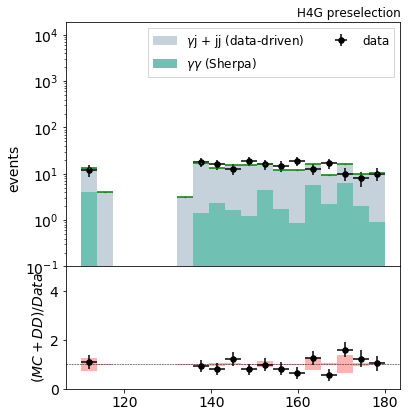

In [274]:
varibale_data_driven(var = 'tp_mass',var_label='$m_{\gamma\gamma\gamma\gamma}$ (GeV)', 
                     bins_ = np.linspace(110,180,20),log=True, blind=True,
                     label=version, L=35.9, mu=1.0)

/usr/local/bin/start_ipykernel.py:13: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:19: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:23: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:26: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:30: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:33: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:36: De

hd : [ 7.  6.  5.  4.  6.  7. 13.  9.  7. 10. 11.  6. 10. 16.  5. 15. 13. 17.
 10. 18.]
dd:  [ 4.7099179   4.91854702  7.30186389  8.85340699 10.41988965  5.60723019
  4.1909607   4.83830175  8.70032452  4.9040146  12.01684692  8.84489437
  4.377106    8.14233194 11.9016811   8.75745996  6.84399082  9.69355356
  6.88314542  7.05180939]


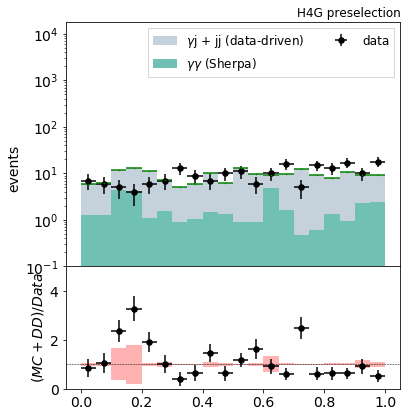

In [275]:
varibale_data_driven(var = 'CTStarCS',
                     var_label='$\cos\Theta^{*}$', 
                     bins_ = np.linspace(0,1,21),log=True,mu=5.0,label=version)


/usr/local/bin/start_ipykernel.py:13: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:19: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:23: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:26: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:30: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:33: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:36: De

hd : [ 8.  6.  9.  9. 12. 10. 11. 10. 14.  7. 14.  9. 16.  9.  9.  9.  9.  9.
  9.  6.]
dd:  [ 8.65819252  7.62410378  8.21187834  7.91050922  9.49353379 11.60731321
  7.36656081  9.75246337 12.66806401  5.14896021  8.5107725   6.72094507
  6.24209045  9.05309444  5.66178486  6.56043968  5.20366298  5.59528875
  3.161696    3.8059227 ]


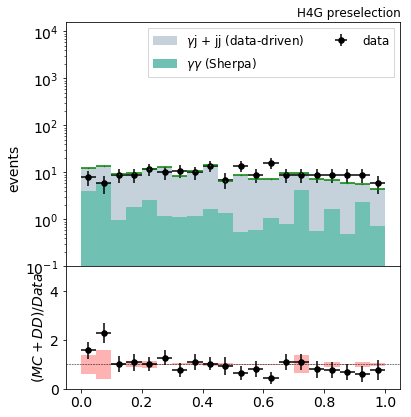

In [270]:
varibale_data_driven(var = 'CT_a1Pho1',
                     var_label='$\cos\Delta\phi \a1\gamma$', 
                     bins_ = np.linspace(0,1,21),log=True, mu=5.0,label=version)

/usr/local/bin/start_ipykernel.py:13: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:19: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:25: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:29: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:32: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:35: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:39: De

hd : [ 8.  5.  8.  8.  9.  5.  9. 12.  9.  7. 16. 10.  7. 14.  9. 21. 13. 11.
  7.  7.]


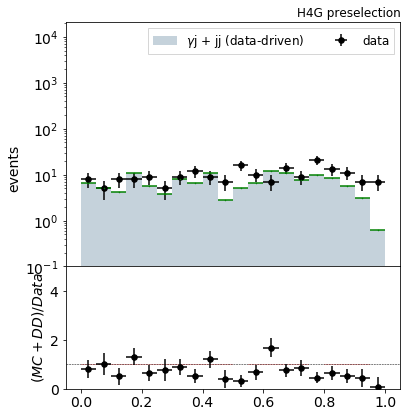

In [90]:
varibale_data_driven(var = 'CT_a2Pho1',
                     var_label='$\cos\Delta\phi \a1\gamma$', 
                     bins_ = np.linspace(0,1,21),log=True, mu=5.0,label=version)

/usr/local/bin/start_ipykernel.py:13: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:19: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:25: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:29: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:32: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:35: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:39: De

hd : [ 0.  7. 48. 60. 44. 12.  6.  3.  0.  1.  3.  1.  2.  1.  1.  0.  2.  0.
  1.  0.]


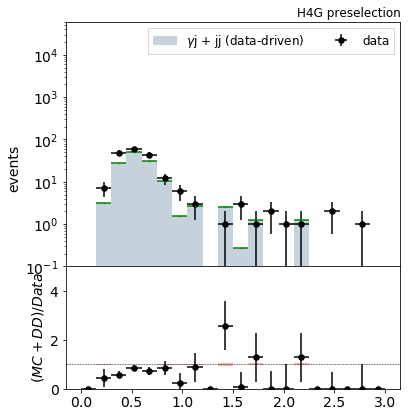

In [91]:
varibale_data_driven(var = 'a2_Pho1PtOvera2Mass',
                     var_label='$pT \gamma3/ M(a2)$', 
                     bins_ = np.linspace(0,3,21),log=True, mu=5.0,label=version)                     
                     

/usr/local/bin/start_ipykernel.py:13: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:19: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:25: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:29: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:32: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:35: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:39: De

hd : [ 0.  6. 69. 67. 19.  9.  8.  6.  2.  0.  2.  2.  2.  1.  0.  0.  0.  2.
  0.  0.]


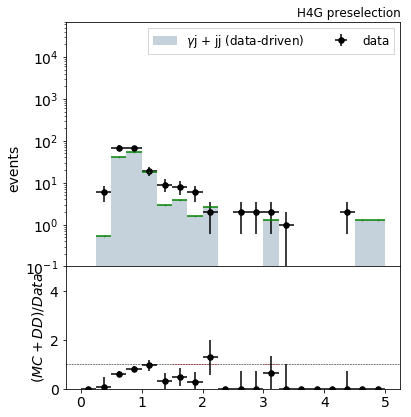

In [92]:
varibale_data_driven(var = 'a1_Pho1PtOvera1Mass',
                     var_label='$pT \gamma1/ M(a1)$', 
                     bins_ = np.linspace(0,5,21),log=True, mu=5.0,label=version)                     
                     

/usr/local/bin/start_ipykernel.py:13: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:19: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:22: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:25: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:29: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:32: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:35: De

hd : [ 1. 17. 32. 18.  6.  6.  1.  2.  0.  2.  0.  2.  0.  2.  0.  0.  0.  1.
  0.  0.]


IOError: [Errno 2] No such file or directory: 'data-driven-xcheck-double-fake-0924-a1_Pt/a1_mass.pdf'

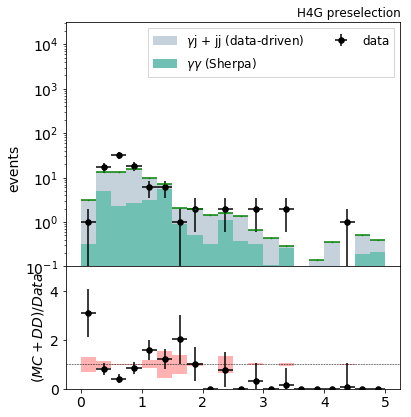

In [313]:
varibale_data_driven(var = 'a1_Pt/a1_mass',
                     var_label='$pT (a1)/ M(a1)$', 
                     bins_ = np.linspace(0,5,21),log=True, mu=5.0,label=version)  

/usr/local/bin/start_ipykernel.py:13: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:19: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:22: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:25: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:29: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:32: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:35: De

hd : [ 0.  1.  5. 11. 11. 19. 13. 13.  4.  5.  4.  1.  3.  1.  0.  0.  0.  0.
  0.  0.]


IOError: [Errno 2] No such file or directory: 'data-driven-xcheck-double-fake-0924-a1_Pt/tp_mass.pdf'

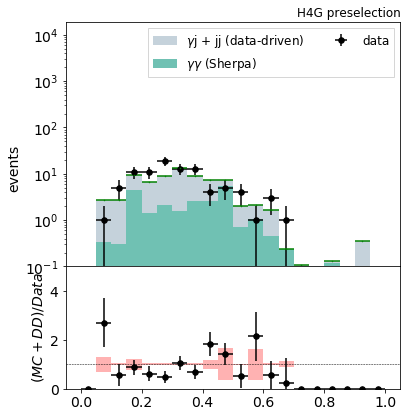

In [314]:
varibale_data_driven(var = 'a1_Pt/tp_mass',
                     var_label='$pT (a1)/ M(h)$', 
                     bins_ = np.linspace(0,1,21),log=True, mu=5.0,label=version)  

/usr/local/bin/start_ipykernel.py:13: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:19: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:22: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:25: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:29: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:32: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:35: De

hd : [ 5. 19. 16. 17. 12. 11.  3.  6.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]


IOError: [Errno 2] No such file or directory: 'data-driven-xcheck-double-fake-0924-a2_Pt/tp_mass.pdf'

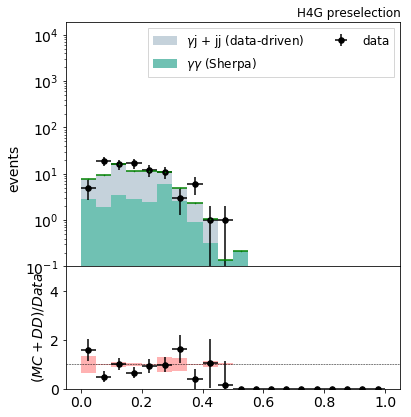

In [315]:
varibale_data_driven(var = 'a2_Pt/tp_mass',
                     var_label='$pT (a2)/ M(h)$', 
                     bins_ = np.linspace(0,1,21),log=True, mu=5.0,label=version)  

In [ ]:
data_driven.Y = 0
data_out = pd.concat([data_driven, data_region, data_SMMC, data_signal])
np.unique(data_out['sample'])

In [ ]:
data_out.to_hdf('Tanvi_test1.h5'   , 'results_table', mode='w', format='table')